## Use R studio or jupyter notebook
1. Download R, Rstudio
https://cloud.r-project.org/
https://www.rstudio.com/products/rstudio/download/
2. Use IRkernel on jupyter notebook

    install jupyter notebook: 
    
    install IRkernel: https://irkernel.github.io/installation/#binary-panel


## Install packages

In [10]:
#install.packages("igraph")# if this failed
# install.packages("igraph", type="binary")
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Basic R
### Datatype and Operations
1. Datatype conversion: https://www.statmethods.net/management/typeconversion.html
2. Operations:https://www.statmethods.net/management/functions.html

In [1]:
indices <- seq(1,10,2)
y <- rep(1:3, 2)
y.cut <- cut(y, 5)
x = c(1,20,2)
print(x)
print(indices)
print(y)
print(y.cut)

[1]  1 20  2
[1] 1 3 5 7 9
[1] 1 2 3 1 2 3
[1] (0.998,1.4] (1.8,2.2]   (2.6,3]     (0.998,1.4] (1.8,2.2]   (2.6,3]    
Levels: (0.998,1.4] (1.4,1.8] (1.8,2.2] (2.2,2.6] (2.6,3]


In [5]:
x <- matrix(1:9,3,3)
print(x)
which(x %% 3 == 0, arr.ind=TRUE)
which(x %% 3 == 0, arr.ind=FALSE)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


row,col
3,1
3,2
3,3


[1] 3 6 9

In [4]:
x <- c(1:10)
x[(x>8) | (x<5)]

[1]  1  2  3  4  9 10

In [8]:
print(x)
head(x, 1)
head(x,2)
tail(x, 1)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


1,4,7


1,4,7
2,5,8


"[3,]",3,6,9


In [6]:
typeof(x)

[1] "integer"

## Generate graph

In [12]:
p <- 0.1 
# create random graph
g1 <- barabasi.game(100, directed=F)
g2 <- erdos.renyi.game(100, p, directed=F)
# create random graph with given degree distribution
g3 <- degree.sequence.game(rep(2,100))
degree(g1)

[1] 10 19  5  3  1  4  6  3  3  1  6  4  1  1  2  2  2  1  2  1  4  1  1  2  1
 [26]  6  1  2  3  3  6  2  2  2  1  3  2  1  3  1  2  2  1  1  1  2  1  2  2  1
 [51]  2  1  1  1  2  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1  2  1  1  1  1
 [76]  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  1

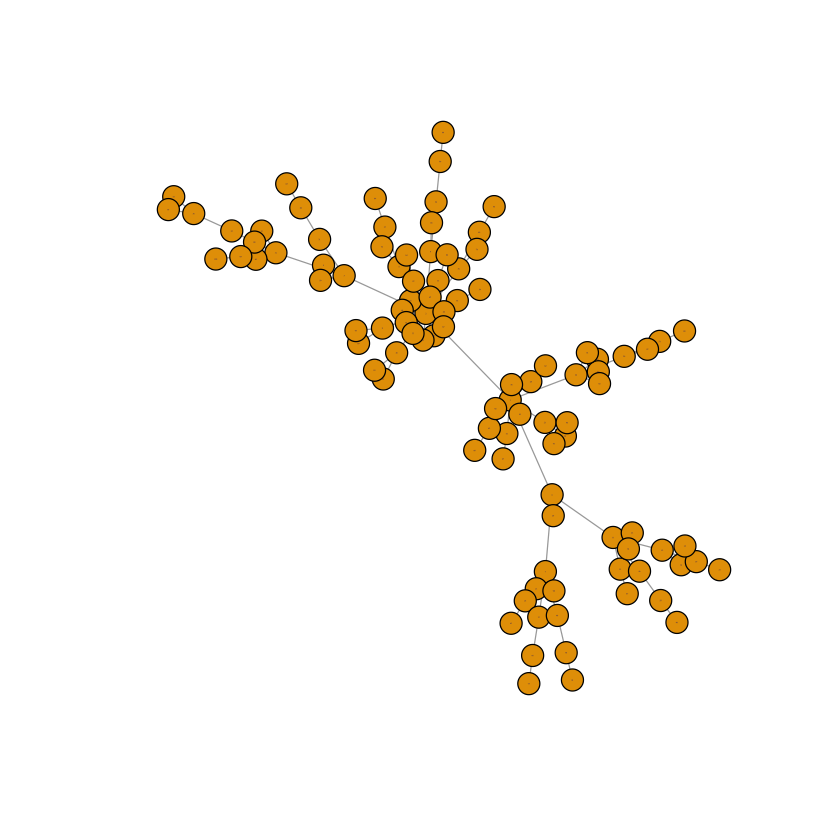

In [14]:
plot(g1,vertex.size=8, vertex.label.cex=0.1)

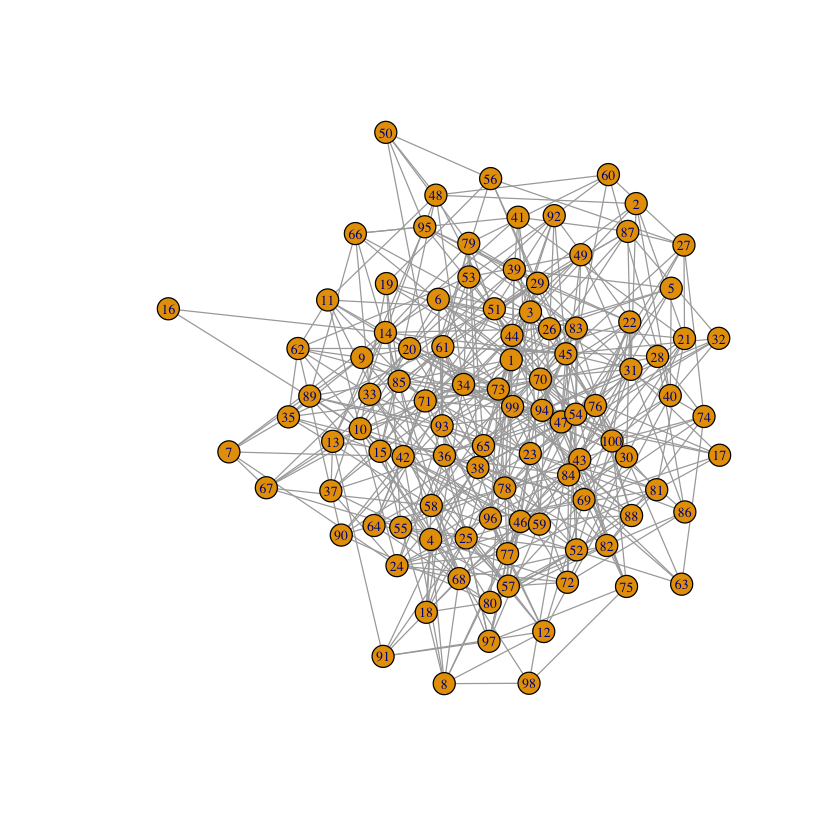

In [10]:
plot(g2,vertex.size=8, vertex.label.cex=0.7)

## Properties

In [18]:
is.connected(g)
vcount(g)
ecount(g)

[1] TRUE

[1] 1000

[1] 49794

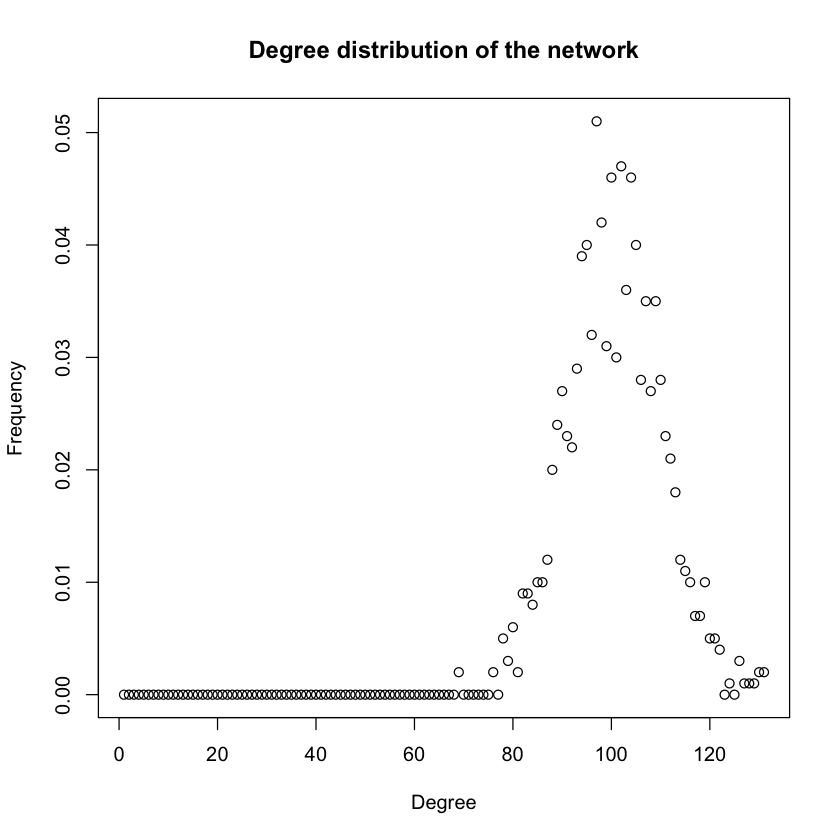

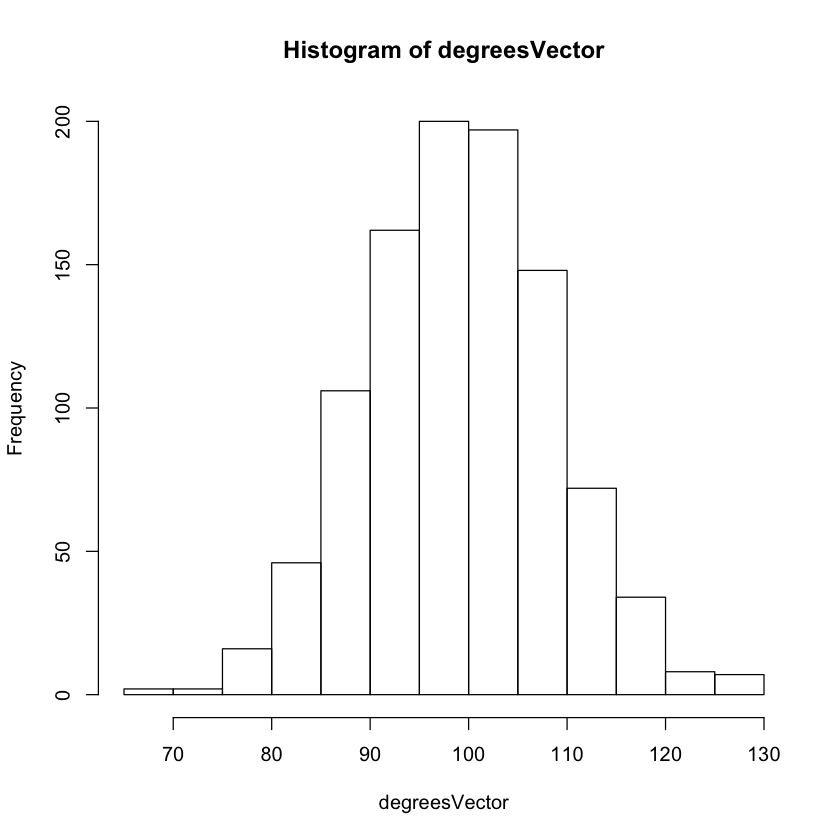

In [21]:
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
degreesVector <- degree(g)
hist(degreesVector)

## Operations on the graph
    1. Get subgraph
    2. Find GCC
    3. Find shortest path between nodes
    4. Find Communities

In [16]:
# http://igraph.org/r/doc/subgraph.html
g <- erdos.renyi.game(1000, p, directed=F)
sub_graph <-induced.subgraph(g,c(1:10))

In [17]:
V(g)[1:3]
E(g)[1:3]

+ 3/1000 vertices, from d39e385:
[1] 1 2 3

+ 3/49951 edges from d39e385:
[1] 4-- 9 1--11 1--13

In [21]:
# Find GCC
g.components <- clusters(g)
print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))



[1] 1000


In [23]:
length(V(g.giant))

[1] 1000

In [155]:
##connected components in the graph
g <- erdos.renyi.game(100, 0.01, directed=F)
is.connected(g)
g.c<-clusters(g)

[1] FALSE

In [134]:
summary(g.c)

           Length Class  Mode   
membership 100    -none- numeric
csize       55    -none- numeric
no           1    -none- numeric

In [184]:
head(shortest.paths(g, mode = "all"),3)

0,2,2,2,2,1,1,2,2,2,⋯,2,2,2,1,2,2,1,2,2,2
2,0,2,2,2,1,2,2,2,2,⋯,2,2,2,2,2,2,2,2,2,2
2,2,0,2,2,2,2,2,2,2,⋯,2,2,2,2,2,2,2,1,2,2


In [190]:
shortest.paths(g, 1,6)

1


In [161]:
fg <- fastgreedy.community(g)
cmsize <- sizes(fg)
print(cmsize)

Community sizes
  1   2   3   4 
 10 161 413 416 


In [176]:
typeof(fg[1])

[1] "list"

In [170]:
which(fg$membership == 1)

[1]  33  99 657 703 771 900 931 932 934 936

## plot

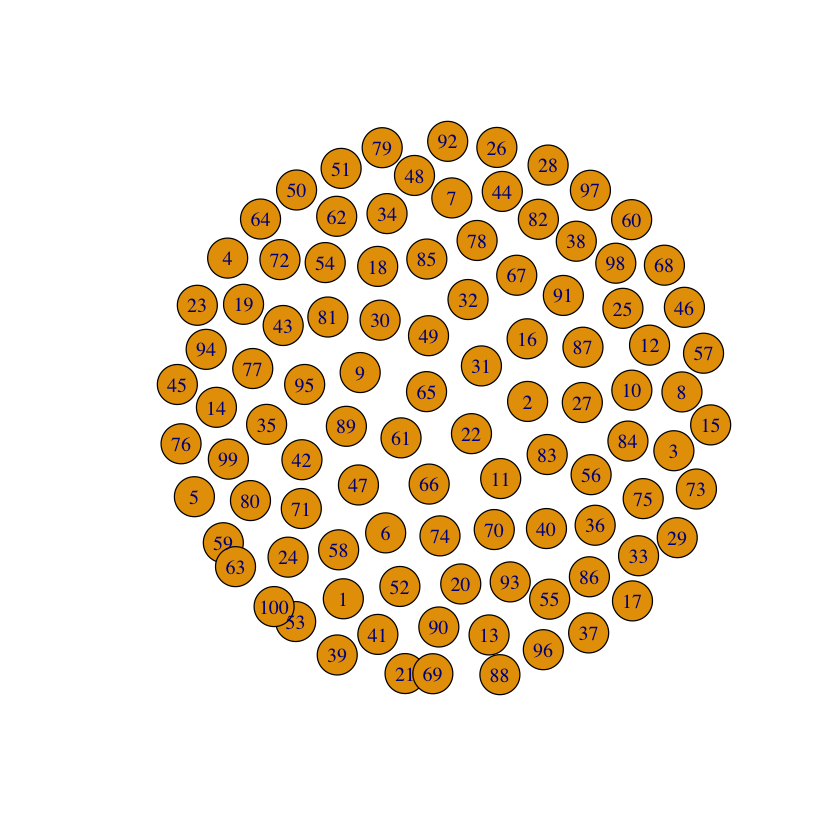

In [76]:
# with given layout
layout <-layout.fruchterman.reingold(g)
plot(g, layout=layout)

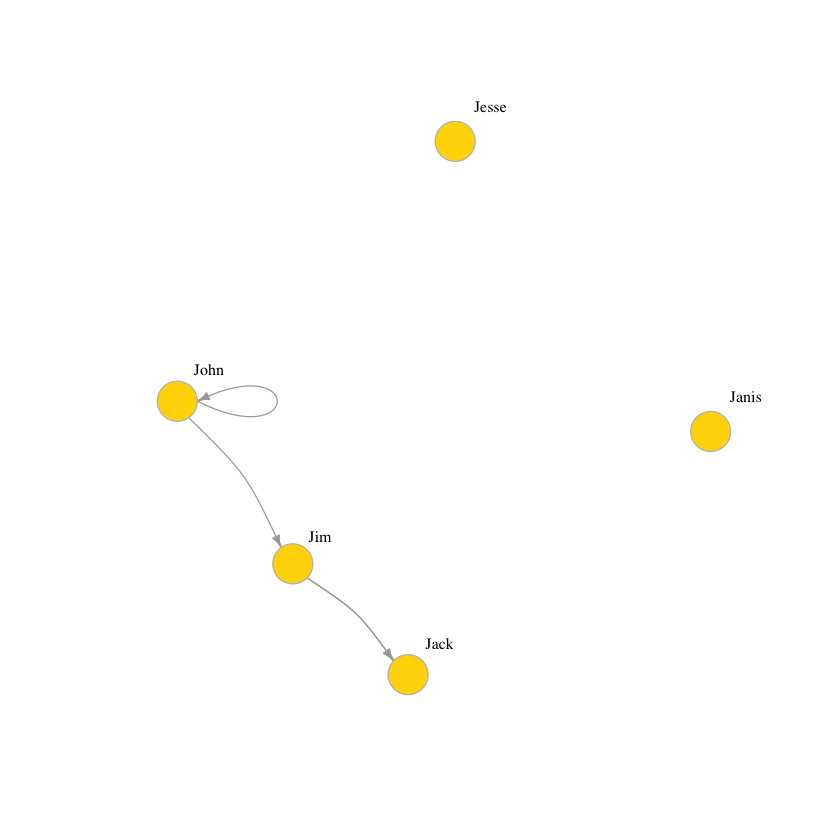

In [77]:
gJ <- graph( c("John", "Jim", "Jim", "Jack", "Jim", "Jack", "John", "John"), 

             isolates=c("Jesse", "Janis"))  

# In named graphs we can specify isolates by providing a list of their names.
plot(gJ, edge.arrow.size=.5, vertex.color="gold", vertex.size=15, 

     vertex.frame.color="gray", vertex.label.color="black", 

     vertex.label.cex=0.8, vertex.label.dist=1, edge.curved=0.2) 